## Phase 4 (Modeling): Decision Tree -- Parameterstudie

* Autorin: Anna (i3-Versicherung)
* Webseite: [Data Science Training - Kapitel 8](https://data-science.training/kapitel-8/)
* Datum: 23.03.2023

Version 5

In [4]:
# Pandas Paket (Package) importieren
#  Datenstrukturen und Datenanalyse, I/O
#  https://pandas.pydata.org/pandas-docs/stable/
import pandas as pd
# NumPy Paket (Package) importieren
#  Mehrdimensionale Datenstrukturen (Vektoren, Matrizen, Tensoren, Arrays), Lineare Algebra
#  https://numpy.org/doc/
import numpy as np
# Pyplot Modul der Matplot Bibliothek (Library) importieren
#  Mathematische grafische Daten-Visualisierungen
#  https://matplotlib.org/contents.html
import matplotlib.pyplot as plt
# Klassen und Funktionen der scikit-learn Module importieren
#  Maschinelles Lernen, Algorithmen
#  https://scikit-learn.org/stable/modules/classes.html
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Pickle Paket (Package) importieren
#  Objekte serialisieren
#  https://docs.python.org/3/library/pickle.html
import pickle as pk
# Eigene Module importieren
#  zur Bewertung der Modelle
import sys
sys.path.append('../00_DST_Module/')
import dst_score_functions as sf

In [5]:
# Datenversion festlegen: 5
version  = 5
# Modell-Abkürzung festlegen: dt = Decision Tree
shortcut = 'dt'
# Parameterstudie festlegen: 1 oder 2
attempt  = 2

In [6]:
# Trainingsdaten als Pandas Data Frame (df) aus Excel-Datei laden
#  (KNIME: "Excel Reader")
filename = '../../data/titanic/new/training_v' + str(version) + '.xlsx'
df_train = pd.read_excel(filename)

In [7]:
# Beschreibende Attribute extrahieren (ohne Survived)
X = df_train.iloc[:,1:].values
# Klassenattribut (Survived) extrahieren
y = df_train.iloc[:,0].values

In [8]:
# Stratifizierte k-fache Kreuzvalidierung (mit k=10)
#  (KNIME: "X-Partitioner")
skf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

In [9]:
# Parameterstudie
#  Wir suchen Entscheidungsbäume, die nicht so komplex sind, um Overfitting zu vermeiden.
#  Hierzu werden verschiedene Parameter eingestellt.
#  Die Genauigkeit (Accuracy) dient dabei als Optimierungskriterium.
#
# Parameterstudie 1
if attempt == 1:
    criteria           = ['entropy', 'gini']  # default = 'gini'
    max_depth_range    = range(1, 6)          # default = None
    min_samples_leaves = range(1, 11)         # default = 1
    min_samples_max    = 30
    min_samples_step   = 1
# Parameterstudie 2
else:
    criteria           = ['entropy', 'gini']  # default = 'gini'
    max_depth_range    = range(1, 5)          # default = None
    min_samples_leaves = [10, 20, 30, 40, 50] # default = 1
    min_samples_max    = 150
    min_samples_step   = 10

In [10]:
# Brute Force Methode
#  Initialisierung
n = 0
best_parameters = None
max_acc = 0
for criterion in criteria: # Schleife über das Split-Kriterium
    print(criterion, ' ', end='')
    for max_depth in max_depth_range: # Schleife über die Tiefe des Baumes
        print(max_depth, ' ', end='')
        for min_samples_leaf in min_samples_leaves: # Schleife über Mindestanzahl der Daten pro Blatt
            print(min_samples_leaf, ' ', end='')
            for min_samples_split in range(2*min_samples_leaf, min_samples_max, min_samples_step): # default = 2
                n = n + 1
                print('.', end='')
                # Modell mit Parameter initialisieren
                model = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth,
                                               min_samples_split=min_samples_split,
                                               min_samples_leaf=min_samples_leaf, random_state=0)
                # Ergebnisse berechnen
                acc = 100.0 * cross_val_score(model, X, y, cv=skf).mean()
                if acc > max_acc:
                    max_acc = acc
                    best_parameters = model.get_params()
                    print(' %8.4f ' % acc, end='')
print()
print('Ergebnis')
print(' Anzahl Parameterkombinationen:', n)
print(' Maximale Genauigkeit:', max_acc)
print(' Parameter des besten Modells:')
print(best_parameters)

entropy  1  10  .  78.2210 ............20  ...........30  .........40  .......50  .....2  10  .............20  ...........30  .........40  .......50  .....3  10  .  81.6991 .......  81.8115 .  82.4856 ....20  ...........30  .........40  .......50  .....4  10  .........  82.5968 ....20  .......  83.0487 ....30  .........40  .......50  .....gini  1  10  .............20  ...........30  .........40  .......50  .....2  10  .............20  ...........30  .........40  .......50  .....3  10  .............20  ...........30  .........40  .......50  .....4  10  .............20  ...........30  .........40  .......50  .....
Ergebnis
 Anzahl Parameterkombinationen: 360
 Maximale Genauigkeit: 83.04868913857678
 Parameter des besten Modells:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 20, 'min_samples_split': 100, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 

In [11]:
# Decision Tree Methode auswählen
#  (KNIME: "Decision Tree Learner")
model = DecisionTreeClassifier()
model.set_params(**best_parameters)
print(model.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 20, 'min_samples_split': 100, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 0, 'splitter': 'best'}


In [12]:
# Ergebnisse berechnen und ausgeben
#  (KNIME: "XYZ Learner", "XYZ Predictor", "X-Aggregator", "Scorer")
scores = sf.dst_scores(model, X, y, cv=skf)
sf.dst_print_scores(scores)


Confusion Matrix

* TN (True  Negatives) : 498
* TP (True  Positives) : 242
* FN (False Negatives) : 100
* FP (False Positives) : 51

Gütemaße

* Genauigkeit  (Accuracy)    :   83,05 %
* Spezifität   (Specificity) :   90,71 %
* Sensitivität (Sensitivity) :   70,73 %
* Präzision    (Precision)   :   83,07 %
* Recall       (Recall)      :   70,73 %
* F-Maß        (F Score)     :   76,12 %
* AURC         (AURC)        :   86,67 %
* LogLoss      (LogLoss)     :    0,429

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  82,23 %


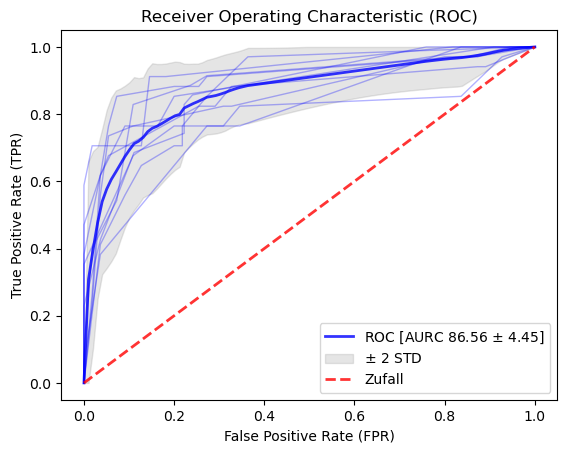

In [13]:
# Receiver Operating Characteristic (ROC) zeichnen
#  (KNIME: "ROC Curve")
sf.dst_roc(model, X, y, cv=skf)

In [14]:
# Modell mit allen Daten trainieren
#  (KNIME: "XYZ Learner")
model.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=20,
                       min_samples_split=100, random_state=0)

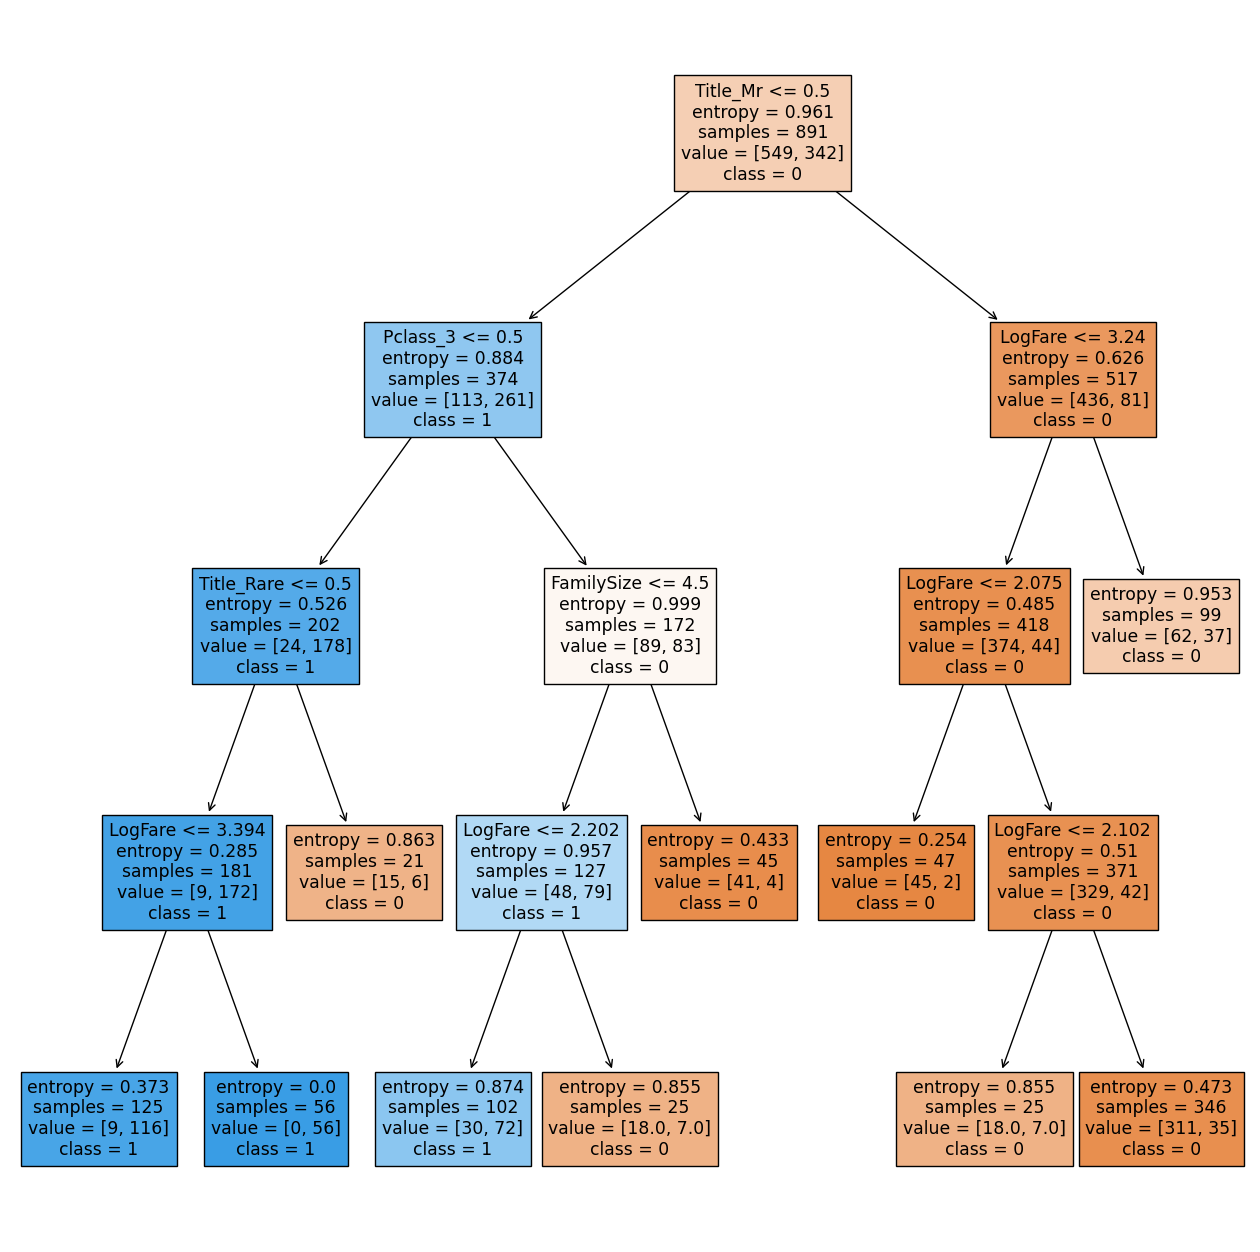

In [15]:
# Entscheidungsbaum visualisieren
#  (KNIME: "Decision Tree Learner")
names = df_train.columns.values
names = np.delete(names, 0) # Ersten Spaltennamen (= Survived) entfernen
names = names.tolist()
plt.figure(figsize=(16, 16))
plot_tree(model, feature_names=names, class_names=['0','1'], filled=True)
plt.show()

In [16]:
# Trainiertes Modell speichern
#  (KNIME: "PMML Writer")
filename = '../../models/titanic/new/' + shortcut + '_v' + str(version) + '_opt_' + str(attempt)
pk.dump(model, open(filename, 'wb'))

## Ergebnisse

#### Parameterstudie 1

Parameter

* criterion: gini
* max_depth: 5
* min_samples_leaf: 1
* min_samples_split: 6

Confusion Matrix

* TN (True  Negatives) : 488
* TP (True  Positives) : 262
* FN (False Negatives) : 80
* FP (False Positives) : 61

Gütemaße

* Genauigkeit  (Accuracy)    :   84,17 %
* Spezifität   (Specificity) :   88,89 %
* Sensitivität (Sensitivity) :   76,60 %
* Präzision    (Precision)   :   81,37 %
* Recall       (Recall)      :   76,60 %
* F-Maß        (F Score)     :   78,77 %
* AURC         (AURC)        :   85,97 %
* LogLoss      (LogLoss)     :    0,961

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  82,57 %

#### Parameterstudie 2

Parameter

* criterion: entropy
* max_depth: 4
* min_samples_leaf: 20
* min_samples_split: 100

Confusion Matrix

* TN (True  Negatives) : 498
* TP (True  Positives) : 242
* FN (False Negatives) : 100
* FP (False Positives) : 51

Gütemaße

* Genauigkeit  (Accuracy)    :   83,05 %
* Spezifität   (Specificity) :   90,71 %
* Sensitivität (Sensitivity) :   70,73 %
* Präzision    (Precision)   :   83,07 %
* Recall       (Recall)      :   70,73 %
* F-Maß        (F Score)     :   76,12 %
* AURC         (AURC)        :   86,67 %
* LogLoss      (LogLoss)     :    0,429

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  82,23 %
